# Autoencoder vs. PCA for Dimensionality Reduction

In this study case, I want to compare the performance of PCA vs. an autoencoder for purposes of dimensionality reduction.

**Autoencoders** are neural networks which are trained to learn a compressed representation of the inputs they are fed.

In this notebook my goal is to show how the dimensionality reduction performed by a simple autoencoder is more interesting than that of PCA, at least regarding visualizations. I will use the Mercedes dataset from [Kaggle](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing) to compare the autoencoder with 1 hidden layer of 2 neurons against the 2 principal components of the Mercedes data matrix. 

In [1]:
import pandas as pd

In [3]:
X = pd.read_csv(URL)

In [4]:
X.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# let us just keep the boolean features and the y
y = X['y']
y.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [6]:
train = X.iloc[:,10:]
print(X.shape)
X.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


Let us build an Autoencoder with 1 hidden layer and only 2 neurons. I.e., we are going from 368 dimensions to 2.

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from livelossplot.inputs.tf_keras import PlotLossesCallback

In [8]:
neurons = 2
activation = ['relu', 'sigmoid']

input_layer = Input(shape=(train.shape[1],))
encoded = Dense(neurons, activation=activation[0])(input_layer)
decoded = Dense(train.shape[1], activation=activation[1])(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
encoder = Model(input_layer, encoded) 

In [9]:
# we need a validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train, test_size=0.2, random_state=42)

In [10]:
epochs = 300
batch_size = 32

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 368)]             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 738       
_________________________________________________________________
dense_1 (Dense)              (None, 368)               1104      
Total params: 1,842
Trainable params: 1,842
Non-trainable params: 0
_________________________________________________________________


In [11]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 368)]             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 738       
Total params: 738
Trainable params: 738
Non-trainable params: 0
_________________________________________________________________


In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=False)
# callbacks = [PlotLossesCallback(), early_stopping]
callbacks = [early_stopping]

history = autoencoder.fit(X_train.values, y_train.values,
               epochs=epochs,
               batch_size=batch_size,
               shuffle=False, #True
               verbose=2,
               validation_data=(X_val.values, y_val.values),
               callbacks=callbacks
               )

Train on 3367 samples, validate on 842 samples
Epoch 1/300
3367/3367 - 1s - loss: 0.5248 - accuracy: 0.7994 - val_loss: 0.2940 - val_accuracy: 0.9129
Epoch 2/300
3367/3367 - 0s - loss: 0.2357 - accuracy: 0.9139 - val_loss: 0.2149 - val_accuracy: 0.9133
Epoch 3/300
3367/3367 - 0s - loss: 0.2079 - accuracy: 0.9141 - val_loss: 0.2067 - val_accuracy: 0.9133
Epoch 4/300
3367/3367 - 0s - loss: 0.2026 - accuracy: 0.9142 - val_loss: 0.2034 - val_accuracy: 0.9133
Epoch 5/300
3367/3367 - 0s - loss: 0.1999 - accuracy: 0.9143 - val_loss: 0.2014 - val_accuracy: 0.9135
Epoch 6/300
3367/3367 - 0s - loss: 0.1980 - accuracy: 0.9144 - val_loss: 0.1998 - val_accuracy: 0.9137
Epoch 7/300
3367/3367 - 0s - loss: 0.1963 - accuracy: 0.9147 - val_loss: 0.1980 - val_accuracy: 0.9143
Epoch 8/300
3367/3367 - 0s - loss: 0.1943 - accuracy: 0.9154 - val_loss: 0.1958 - val_accuracy: 0.9148
Epoch 9/300
3367/3367 - 0s - loss: 0.1917 - accuracy: 0.9162 - val_loss: 0.1928 - val_accuracy: 0.9153
Epoch 10/300
3367/3367 - 0

Epoch 80/300
3367/3367 - 0s - loss: 0.1494 - accuracy: 0.9384 - val_loss: 0.1526 - val_accuracy: 0.9374
Epoch 81/300
3367/3367 - 0s - loss: 0.1492 - accuracy: 0.9385 - val_loss: 0.1525 - val_accuracy: 0.9374
Epoch 82/300
3367/3367 - 0s - loss: 0.1491 - accuracy: 0.9386 - val_loss: 0.1524 - val_accuracy: 0.9373
Epoch 83/300
3367/3367 - 0s - loss: 0.1490 - accuracy: 0.9386 - val_loss: 0.1523 - val_accuracy: 0.9374
Epoch 84/300
3367/3367 - 0s - loss: 0.1488 - accuracy: 0.9387 - val_loss: 0.1522 - val_accuracy: 0.9374
Epoch 85/300
3367/3367 - 0s - loss: 0.1487 - accuracy: 0.9388 - val_loss: 0.1521 - val_accuracy: 0.9375
Epoch 86/300
3367/3367 - 0s - loss: 0.1485 - accuracy: 0.9388 - val_loss: 0.1520 - val_accuracy: 0.9375
Epoch 87/300
3367/3367 - 0s - loss: 0.1484 - accuracy: 0.9388 - val_loss: 0.1519 - val_accuracy: 0.9376
Epoch 88/300
3367/3367 - 0s - loss: 0.1483 - accuracy: 0.9389 - val_loss: 0.1518 - val_accuracy: 0.9375
Epoch 89/300
3367/3367 - 0s - loss: 0.1481 - accuracy: 0.9390 - 

Epoch 159/300
3367/3367 - 0s - loss: 0.1428 - accuracy: 0.9414 - val_loss: 0.1490 - val_accuracy: 0.9401
Epoch 160/300
3367/3367 - 0s - loss: 0.1428 - accuracy: 0.9414 - val_loss: 0.1490 - val_accuracy: 0.9401
Epoch 161/300
3367/3367 - 0s - loss: 0.1427 - accuracy: 0.9414 - val_loss: 0.1490 - val_accuracy: 0.9401
Epoch 162/300
3367/3367 - 0s - loss: 0.1427 - accuracy: 0.9414 - val_loss: 0.1489 - val_accuracy: 0.9400
Epoch 163/300
3367/3367 - 0s - loss: 0.1426 - accuracy: 0.9414 - val_loss: 0.1489 - val_accuracy: 0.9400
Epoch 164/300
3367/3367 - 0s - loss: 0.1426 - accuracy: 0.9415 - val_loss: 0.1489 - val_accuracy: 0.9400
Epoch 165/300
3367/3367 - 0s - loss: 0.1425 - accuracy: 0.9415 - val_loss: 0.1489 - val_accuracy: 0.9400
Epoch 166/300
3367/3367 - 0s - loss: 0.1425 - accuracy: 0.9415 - val_loss: 0.1489 - val_accuracy: 0.9400
Epoch 167/300
3367/3367 - 0s - loss: 0.1424 - accuracy: 0.9415 - val_loss: 0.1489 - val_accuracy: 0.9401
Epoch 168/300
3367/3367 - 0s - loss: 0.1424 - accuracy:

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
train_loss = history.history['loss']
valid_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']

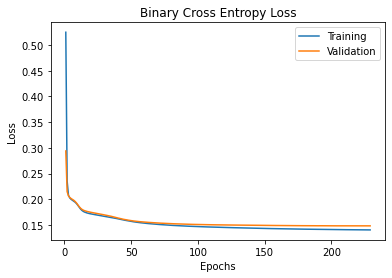

In [15]:
import matplotlib.pyplot as plt
epochs_taken = early_stopping.stopped_epoch
plt.plot(list(range(1, epochs_taken+2)),
        train_loss,
        label='Training')
plt.plot(list(range(1, epochs_taken+2)),
        valid_loss,
        label='Validation')
plt.title('Binary Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

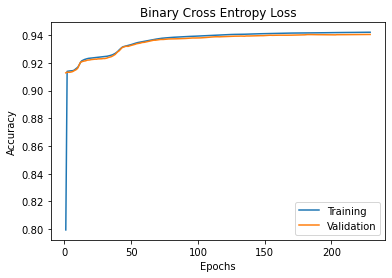

In [16]:
epochs_taken = early_stopping.stopped_epoch
plt.plot(list(range(1, epochs_taken+2)),
        train_accuracy,
        label='Training')
plt.plot(list(range(1, epochs_taken+2)),
        valid_accuracy,
        label='Validation')
plt.title('Binary Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Let us see how the encoding of the autoencoder performs.

In [17]:
encoded_features = encoder.predict(train.values)

Now, let us plot the 2 dimensional features on a scatter plot showing the features' corresponding y-value as well.

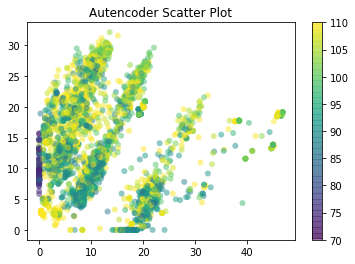

In [18]:
plt.scatter(encoded_features[:,0], encoded_features[:,1], 
            cmap="viridis",
            c=y,  
            edgecolor="None", 
            alpha=0.5,
            vmin=70, 
            vmax=110)
plt.colorbar()
plt.title('Autencoder Scatter Plot')
plt.show()

Let us now look at PCA:

Percentage of variance explained: 21.97


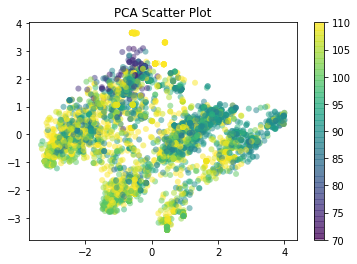

In [23]:
from sklearn.decomposition import PCA, FastICA

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(train.values)
print(f'Percentage of variance explained: {round(pca.explained_variance_ratio_.sum(), 4)*100}')
plt.scatter(pca_2d[:,0],
            pca_2d[:,1],  
            cmap="viridis",
            c=y,  
            edgecolor="None", 
            alpha=0.5,
            vmin=70, 
            vmax=110)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.show()

You can see how those samples corresponding to low y-values are more clearly clustered together in the autoencoder scatter plot than in the PCA one. Those who have worked on the Mercedes Dataset know that this is due to the variable X232. We can visualize this in the below plots:

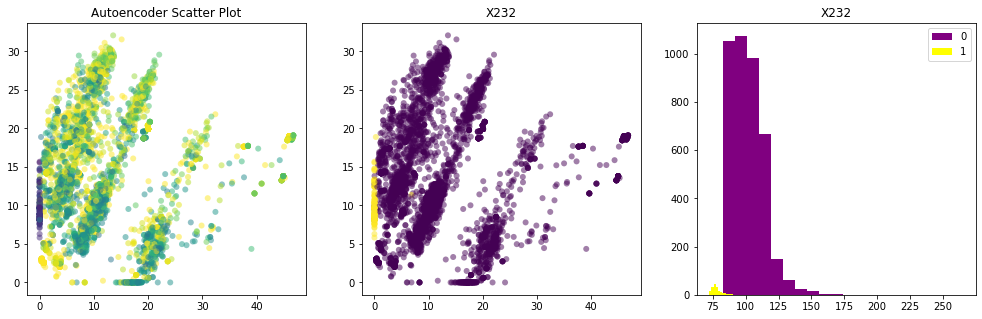

In [21]:
var = train['X232']
plt.figure(figsize = (17,5))
plt.subplot(131)
plt.scatter(encoded_features[:,0], encoded_features[:,1],  
            cmap="viridis",
            c=y,  
            edgecolor="None", 
            alpha=0.5,
            vmin=70, 
            vmax=110)
plt.title('Autoencoder Scatter Plot')

plt.subplot(132)
plt.scatter(encoded_features[:,0], encoded_features[:,1],  
            c=var, 
            cmap="viridis", 
            edgecolor="None", 
            alpha=0.5, 
            vmin=0,
            vmax = 1)
plt.title('X232')

plt.subplot(133)
plt.hist(y[var==0],  bins=20, label='0', color='purple')
plt.hist(y[var==1],  bins=20, label='1', color = 'yellow')
plt.title('X232')
plt.legend()

plt.show()